## Applying topological data analysis to corpus comparison

This is a demostration of some experiments given in my paper.

So, let's load some packages:

In [1]:
import re
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import dionysus as dn
import numpy as np
import pymorphy2
import nltk
from string import punctuation

### Prepare texts 

Then we create some usefull functions:

In [15]:
PATH = '/Users/alexey/Documents/GitHub/dialog_persistent/stop words/sw.txt'

with open(PATH) as f:
    stop_words = f.read().splitlines()

In [16]:
def check_sentence(sentence):
    '''Check for stop words'''
    for element in sentence:
        if element in stop_words:
            sentence.remove(element)
    
    return sentence

In [17]:
def tokenize_and_lemmatize(path):
    '''
    This function is used to tokenize and lemmatize texts.
    '''

    morph = pymorphy2.MorphAnalyzer()

    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

    file = open(path).read()

    sentences = tokenizer.tokenize(file)

    sentenses_splitted = []

    for s in sentences:   
        s = s.translate(str.maketrans('','', punctuation))
        sentenses_splitted.append(s.lower().split())

    for sentence in sentenses_splitted:
        for i in range(len(sentence)):
            p = morph.parse(sentence[i])[0]
            sentence[i] = p.normal_form
            
    for i in range(len(sentenses_splitted)):
        sentenses_splitted[i] = check_sentence(sentenses_splitted[i])
    

    return sentenses_splitted

## Get vectors from word2vec models:

In [18]:
def get_vectors(model, dimensions=100): 
    '''
    This function is used to extract vectors
    '''
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])

    result_array = np.empty((0, dimensions))

    for token in tokens:
        result_array = np.append(result_array, [token], axis=0)
    
    return result_array

## Then some experiments:

Here we apply our function to out text:

In [20]:
text_1 = tokenize_and_lemmatize('/Users/alexey/Documents/GitHub/dialog_persistent/texts/mashenka.txt')

In [22]:
text_1[1:3]

[['рассказывать',
  'он',
  'верный',
  'происхождение',
  'связать',
  'вопрос',
  'вивисекция'],
 ['художник',
  'роберт',
  'горн',
  'проживать',
  'ньюйорк',
  'завтракать',
  'случайный',
  'знакомый',
  'молодая',
  'физиолог']]

Then we create a model:

In [23]:
model_1 = word2vec.Word2Vec(text_1, size=100, window=20,
                                  min_count=10, workers=4)

In [24]:
vectors_1 = get_vectors(model_1)
len(vectors_1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


508

In [25]:
f_lower_star = dn.fill_freudenthal(vectors_1)
f_upper_star = dn.fill_freudenthal(vectors_1, reverse = True)

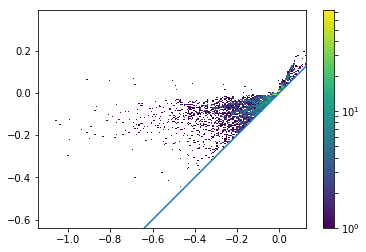

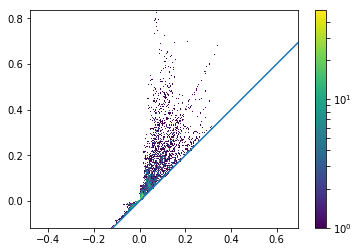

In [26]:
p = dn.homology_persistence(f_lower_star)
dgms = dn.init_diagrams(p, f_lower_star)

dn.plot.plot_diagram_density(dgms[0], show = True)
dn.plot.plot_diagram_density(dgms[1], show = True)